In [6]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.colors as clr
from scipy.interpolate import griddata
import cartopy.crs as ccrs

In [7]:
# we need to coordinates file to access the corner points - glamf/gphif
model_mask_file = '/storage/shared/oceanparcels/input_data/NEMO16_CMCC/' + 'GLOB16L98_mesh_mask_atlantic.nc'

mask_ds = xr.open_dataset(model_mask_file, decode_times=False).load()
mask_lon = mask_ds['glamf'].values
mask_lat = mask_ds['gphif'].values
mask_land = mask_ds['tmask'].values

In [8]:
left_lon = 13.0
right_lon = 14.8
top_lat = -25.7
bottom_lat = -27.5
delta = 0.0625/4  # divided by 4 (1601, 1025) n=1,161,543(linear, but particles near 21E), 1,153,714(nearest) and without (401, 257) n=72,842
# delta = 0.25

lons = np.arange(left_lon, right_lon + delta, delta)
lats = np.arange(bottom_lat, top_lat + delta, delta)
regions_lons, regions_lats = np.meshgrid(lons, lats)
print(regions_lons.shape)

(117, 117)


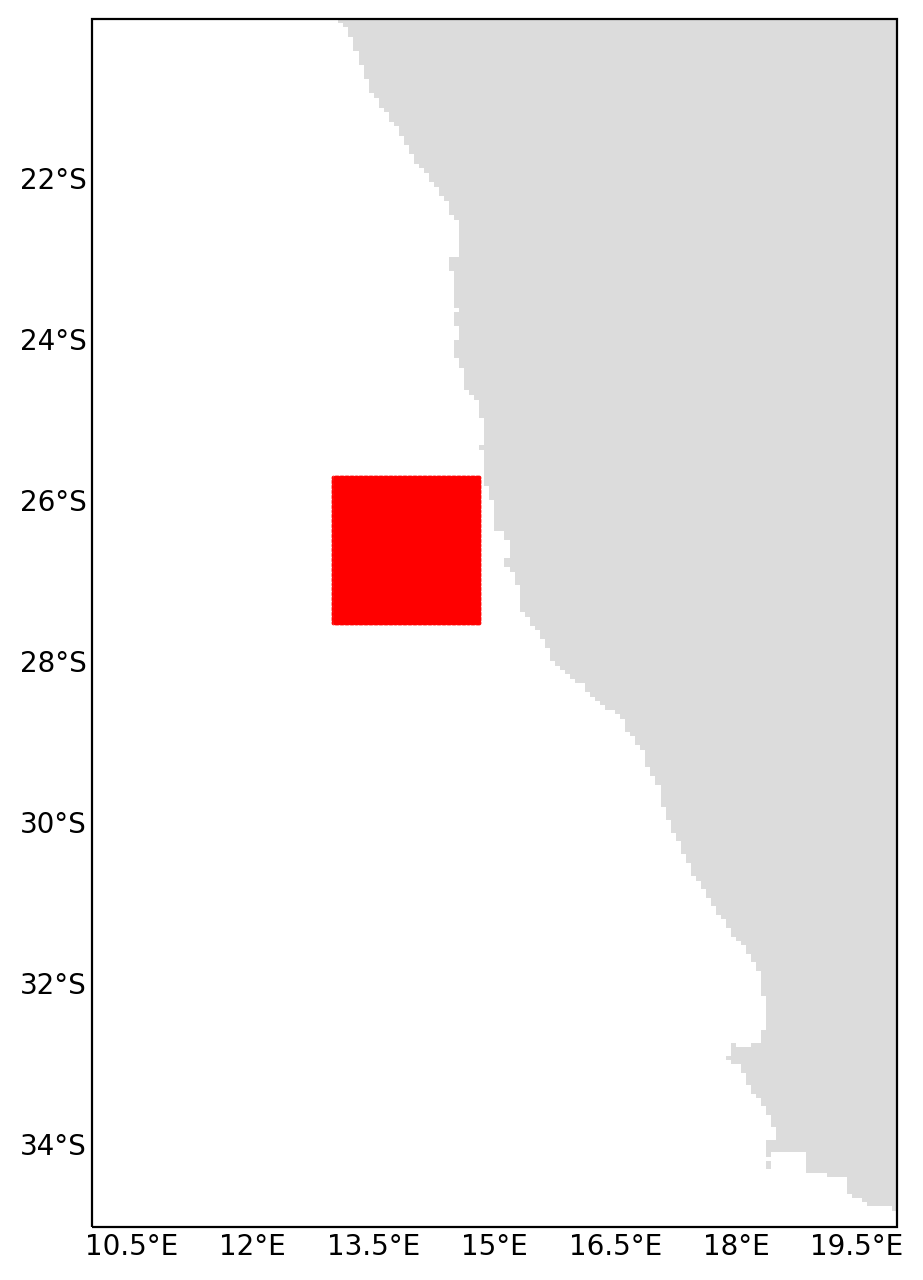

In [9]:
custom_size=10
fig = plt.figure(figsize=(12,8), dpi=200)
ax = plt.axes(projection=ccrs.PlateCarree())
gl = ax.gridlines(draw_labels=True)
gl.xlines = False
gl.ylines = False
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': custom_size, 'color': 'k'}
gl.ylabel_style = {'size': custom_size, 'color': 'k'}
colormap = clr.ListedColormap(['gainsboro', 'white'])

ax.pcolormesh(mask_lon[0, 1249:1750, 1499:], mask_lat[0, 1249:1750, 1499:], mask_land[0,0, 1250:1750, 1500:], cmap=colormap)
ax.set_xlim(10, 20)
ax.set_ylim(-35, -20)
ocean_lons = regions_lons
ocean_lats = regions_lats
# ax.set_xlim(12,16)
# ax.set_ylim(-29,-25)
ax.scatter(ocean_lons, ocean_lats, s=0.1, c="red")
plt.show()

In [10]:
np.savez_compressed('/nethome/manra003/analysis/dispersion/Luderitz_cell_117x117.npz',
                    Longitude=regions_lons.ravel(),
                    Latitude=regions_lats.ravel())